# Schwarzschild spacetime


In [1]:
version()

'SageMath version 8.2, Release Date: 2018-05-05'

First we set up the notebook to display mathematical objects via LaTeX rendering:

In [2]:
%display latex

## Spacetime manifold

We declare the spacetime manifold as a 4-dimensional Lorentzian manifold:

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


## Standard coordinates

The standard **Schwarzschild-Droste coordinates** are introduced via the method `chart()` applied to the manifold object `M`. Note that the argument of `chart()` is a raw string (hence the prefix `r` in front of it), which 
defines the range of each coordinate, if different from $(-\infty, +\infty)$, as well as its LaTeX symbol, if different from the Python symbol to denote the coordinate. The Python variables for each coordinate are declared within the `<...>` operator on the left-hand side, `X` denoting the Python variable chosen for the coordinate chart.

In [4]:
X.<t,r,th,ph> = M.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:\phi")
X

Chart (M, (t, r, th, ph))

In [5]:
X[:]

(t, r, th, ph)

In [6]:
X[0], X[3]

(t, ph)

For graphical purposes, we introduce $\mathbb{R}^3$ and some coordinate map $M\to \mathbb{R}^3$:

In [7]:
R3 = Manifold(3, 'R^3', latex_name=r'\mathbb{R}^3')
X3.<x,y,z> = R3.chart()
to_R3 = M.diff_map(R3, {(X, X3): [r*sin(th)*cos(ph), 
                                  r*sin(th)*sin(ph), r*cos(th)]})
to_R3.display()

M --> R^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

## Metric tensor

We introduce first the mass parameter $m$ (=mG) as a symbolic variable, via the function `var()`:

In [8]:
m = var('m')
assume(m>=0)

The metric tensor of the Lorentzian manifold `M` is returned by the method `metric()`; we initialize its components in the chart `X`, which is the default (unique) chart on `M`:

In [9]:
g = M.metric()
g[0,0] = -(1-2*m/r)
g[1,1] = 1/(1-2*m/r)
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

Viewing the metric components as a matrix:

In [10]:
g[:]

[     2*m/r - 1              0              0              0]
[             0 -1/(2*m/r - 1)              0              0]
[             0              0            r^2              0]
[             0              0              0  r^2*sin(th)^2]

Accessing to a specific component:

In [11]:
g[0,0]

2*m/r - 1

## Christoffel symbols

The Christoffel symbols of $g$ with respect to the Schwarzschild-Droste coordinates are
printed by the method `christoffel_symbols_display()` applied to the metric object `g`. By 
default, only the nonzero symbols and the nonredundant ones (taking into account the symmetry of the last two indices) are displayed. Type `g.christoffel_symbols_display?` to see all possible options.

In [12]:
g.christoffel_symbols_display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

Accessing to a Christoffel symbol specified by its indices:

In [13]:
g.christoffel_symbols()[0,0,1]

-m/(2*m*r - r^2)

Checking the symmetry on the last two indices:

In [14]:
g.christoffel_symbols()[0,0,1] == g.christoffel_symbols()[0,1,0]

True

## Einstein equation

Let us check that $g$ is a solution of the vacuum Einstein equation, i.e. that its Ricci tensor vanishes identically:
$$R_{\mu\nu}=0$$

In [15]:
g.ricci()

Field of symmetric bilinear forms Ric(g) on the 4-dimensional Lorentzian manifold M

In [16]:
g.ricci().display()

Ric(g) = 0

In [17]:
g.ricci()[:]

[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]

In [18]:
 g.ricci_scalar().display()

r(g): M --> R
   (t, r, th, ph) |--> 0

## Curvature tensor

**The necessary and sufficient condition for a Riemannian space to be flat is that its curvature vanishes ($R^{\lambda}_{\phantom{\mu}\mu\nu\kappa}=0)$**
<br><br>
The Riemann curvature tensor is obtained by the method `riemann()`:

In [19]:
R = g.riemann()
print(R)

Tensor field Riem(g) of type (1,3) on the 4-dimensional Lorentzian manifold M


Contrary to the Ricci tensor, it is not identically zero:

In [20]:
R.display()

Riem(g) = -2*m/(2*m*r^2 - r^3) d/dt*dr*dt*dr + 2*m/(2*m*r^2 - r^3) d/dt*dr*dr*dt - m/r d/dt*dth*dt*dth + m/r d/dt*dth*dth*dt - m*sin(th)^2/r d/dt*dph*dt*dph + m*sin(th)^2/r d/dt*dph*dph*dt - 2*(2*m^2 - m*r)/r^4 d/dr*dt*dt*dr + 2*(2*m^2 - m*r)/r^4 d/dr*dt*dr*dt - m/r d/dr*dth*dr*dth + m/r d/dr*dth*dth*dr - m*sin(th)^2/r d/dr*dph*dr*dph + m*sin(th)^2/r d/dr*dph*dph*dr + (2*m^2 - m*r)/r^4 d/dth*dt*dt*dth - (2*m^2 - m*r)/r^4 d/dth*dt*dth*dt - m/(2*m*r^2 - r^3) d/dth*dr*dr*dth + m/(2*m*r^2 - r^3) d/dth*dr*dth*dr + 2*m*sin(th)^2/r d/dth*dph*dth*dph - 2*m*sin(th)^2/r d/dth*dph*dph*dth + (2*m^2 - m*r)/r^4 d/dph*dt*dt*dph - (2*m^2 - m*r)/r^4 d/dph*dt*dph*dt - m/(2*m*r^2 - r^3) d/dph*dr*dr*dph + m/(2*m*r^2 - r^3) d/dph*dr*dph*dr - 2*m/r d/dph*dth*dth*dph + 2*m/r d/dph*dth*dph*dth

The component $R^0_{\ \,101} = R^t_{\ \,trt}$ of the Riemann tensor:

In [21]:
R[0,1,0,1]

-2*m/(2*m*r^2 - r^3)

## Kretschmann scalar

The Kretschmann scalar is an invariant (do not depend on coordinate frame) that can be used to detect real sigularities of the metric. It is the "square" of the Riemann tensor defined by: 
$$ K = R_{abcd} R^{abcd}$$
To compute it, we must form first the tensor fields whose components are $R_{abcd}$ and 
$R^{abcd}$. They are obtained by respectively lowering and raising the indices of the components $R^a_{\ \, bcd}$ of the Riemann tensor, via the metric $g$. These two operations are performed by the methods `down()` and `up()`. The contraction is performed by summation on repeated indices, using LaTeX notations:

In [22]:
K = R.down(g)['_{abcd}'] * R.up(g)['^{abcd}']
K

Scalar field on the 4-dimensional Lorentzian manifold M

In [23]:
K.display()

M --> R
(t, r, th, ph) |--> 48*m^2/r^6

The symbolic expression representing the scalar field $K$ is returned by the method `expr()`:

In [24]:
K.expr()

48*m^2/r^6

# Timelike Geodesic

A geodesic ds is timelike, lightlike (null), or spacelike according to whether ds² is positive, zero, or negative.

Particles travelling faster than speed of light generate space-like geodesics.(ds²<0, forbidden)<br>
Particles travelling slower than speed of light generate time-like geodesics. (ds²>0, massive particles)<br>
Particles travelling at speed of light generate null geodesics. (ds²=0, photons)<br>

Full geodesic equation:

$$\frac{d^{2}x^{\mu }}{ds^{2}}+\Gamma ^{\mu }_{\alpha \beta }\frac{dx^{\alpha }}{ds}\frac{dx^{\beta 
}}{ds}=0$$

We pick an initial point and an initial tangent vector:

In [25]:
p0 = M.point((0, 8*m, pi/2, 1e-12), name='p_0')
v0 = M.tangent_space(p0)((1.297513, 0, 0, 0.0640625/m), name='v_0')
v0.display()

v_0 = 1.29751300000000 d/dt + 0.0640625000000000/m d/dph

We declare a geodesic with such initial conditions, denoting by $s$ the affine parameter (proper time), with $(s_{\rm min}, s_{\rm max})=(0, 1500\,m)$:

In [26]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 1500), v0); geod

Integrated geodesic in the 4-dimensional Lorentzian manifold M

We ask for the numerical integration of the geodesic, providing some numerical value for the parameter $m$, and then plot it in terms of the Cartesian chart `X3` of $\mathbb{R}^3$:

In [27]:
sol = geod.solve(parameters_values={m: 1})  # numerical integration
interp = geod.interpolate()                 # interpolation of the solution for the plot
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500, 
                             thickness=2, label_axes=False)           # the geodesic
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1}) # the starting point
graph += sphere(size=2, color='grey')                                 # the event horizon
show(graph, viewer='threejs', online=True)

Graphics3d Object

A Tachyon view of the geodesic:

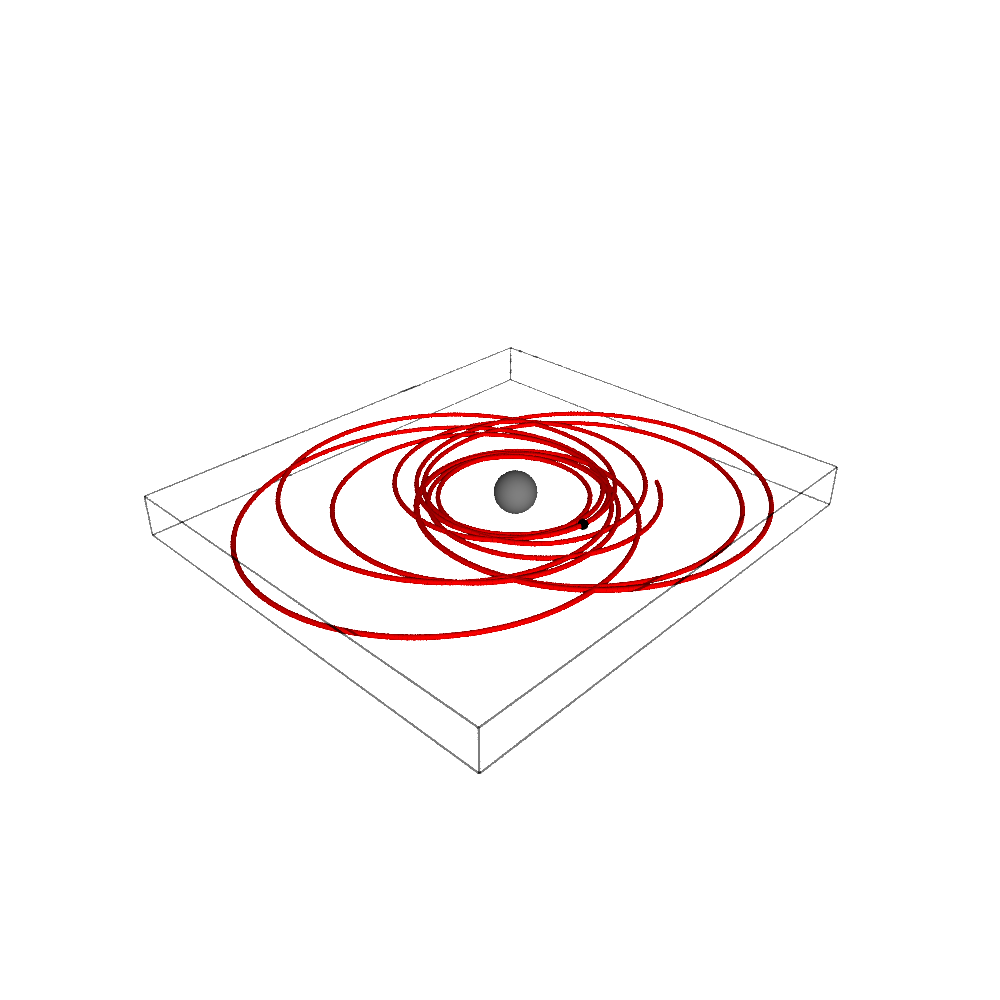

In [28]:
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Some details about the system solved to get the geodesic:

In [29]:
geod.system(verbose=True)

Geodesic in the 4-dimensional Lorentzian manifold M equipped with Lorentzian metric g on the 4-dimensional Lorentzian manifold M, and integrated over the Real interval (0, 2500) as a solution to the following geodesic equations, written with respect to Chart (M, (t, r, th, ph)):

Initial point: Point p_0 on the 4-dimensional Lorentzian manifold M with coordinates [0, 8*m, 1/2*pi, 1.00000000000000e-12] with respect to Chart (M, (t, r, th, ph))
Initial tangent vector: Tangent vector v_0 at Point p_0 on the 4-dimensional Lorentzian manifold M with components [1.29751300000000, 0, 0, 0.0640625000000000/m] with respect to Chart (M, (t, r, th, ph))

d(t)/ds = Dt
d(r)/ds = Dr
d(th)/ds = Dth
d(ph)/ds = Dph
d(Dt)/ds = 2*Dr*Dt*m/(2*m*r - r^2)
d(Dr)/ds = -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4)
d(Dth)/ds = (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r
d(Dph)/ds = -2*(Dph*Dth*

[[2*Dr*Dt*m/(2*m*r - r^2),
  -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4),
  (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r,
  -2*(Dph*Dth*r*cos(th) + Dph*Dr*sin(th))/(r*sin(th))],
 Tangent vector v_0 at Point p_0 on the 4-dimensional Lorentzian manifold M,
 Chart (M, (t, r, th, ph))]